<a href="https://colab.research.google.com/github/akanupam/PyTorch-journey/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pytorch workflow



In [ ]:
import torch
from torch import nn #nn contains all the pytorch's bulding blocks for the neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

#Data preparing and loading


### Let's use linear regression formula to make a straight line with known parameters

In [ ]:
# known parameters
# Y = a + bX : weight=b, bias =a
weight = 0.7
bias = 0.3

# create

start = 0
end =1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = bias + weight*X

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

### splitting data in training and test set

In [ ]:
# create a train test split
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

### data visualization

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.figure(figsize=(10,7))

  # Plotting training data color blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plotting testing data green color
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    #plot predictions if any
    plt.scatter(test_data, predictions, c="r",s=4, label = "predictions")

  #show the legend
  plt.legend(prop={"size":14});


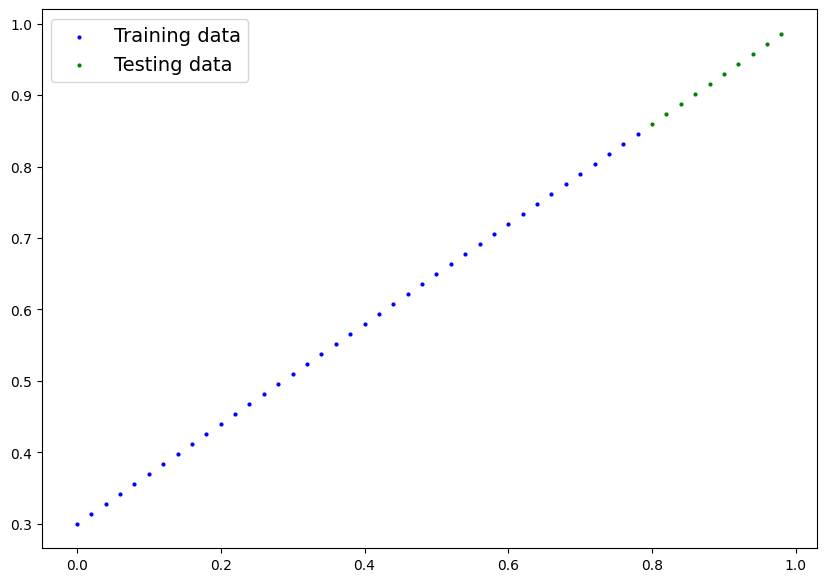

In [ ]:
plot_predictions()

#Build model

In [ ]:
class LinearRegressionModel(nn.Module): # almost everything in pytorch is nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #start with random weights
                                            dtype=torch.float), #pytorch loves float32
                                requires_grad=True) # can update this with gradient decsent
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype=torch.float32),
                             requires_grad=True)
  def forward(self, x:torch.Tensor) -> torch.tensor: #definig the computation in model
    return self.weights * x + self.bias


In [ ]:
#Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)
# create an instance of model
model_0 = LinearRegressionModel()

# Check the nn.parameters within the nn.module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Making predictions

with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
# check predictions
print(f"No. of testing samples:{len(X_test)} ")
print(f"No. of predictions made: {len(y_preds)}")
print(f"Predicted values: \n{y_preds}")

No. of testing samples:10 
No. of predictions made: 10
Predicted values: 
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


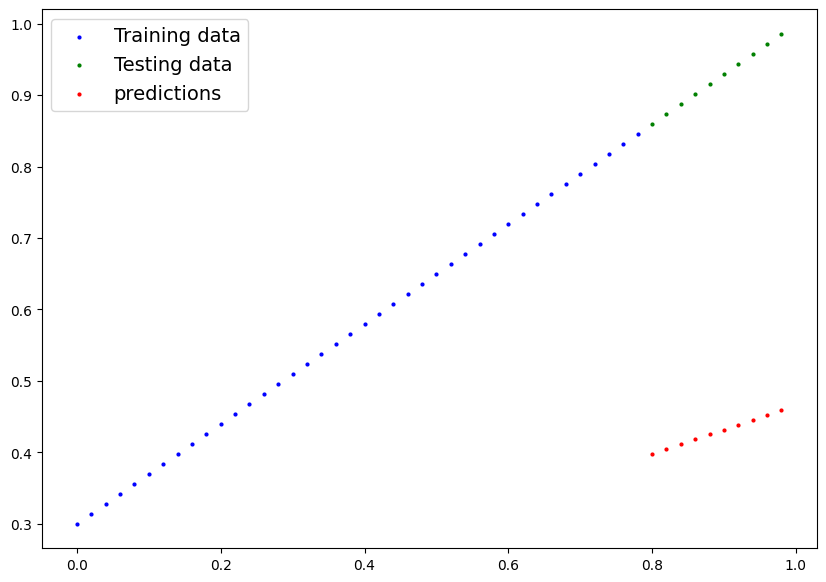

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

### Since there's a huge gap between test and predictions we need to properly train our model


#Train Model

###For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

###And that's a loss function as well as an optimizer

In [ ]:
# create loss funtion
loss_fn = nn.L1Loss() # MAE is same as L1Loss
# create optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)
# learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))


In [ ]:
torch.manual_seed(42)
epochs = 150

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  ### Training

  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### testing

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test loss: {test_loss}")



Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test loss: 0.06473556160926819
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test loss: 0.05646304413676262
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE Test loss:

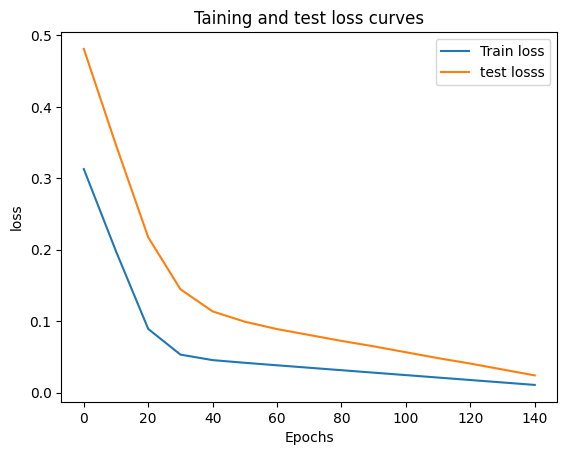

In [ ]:
plt.plot(epoch_count, train_loss_values, label= "Train loss")
plt.plot(epoch_count, test_loss_values, label="test losss")
plt.title("Taining and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
print(f"The model learned the following values for weight and bias: \n{model_0.state_dict()}")

The model learned the following values for weight and bias: 
OrderedDict([('weights', tensor([0.6638])), ('bias', tensor([0.3153]))])


# on increasing no of epochs the parameters got closer to the actual values

### Making predictions

In [ ]:
model_0.eval()

with torch.inference_mode():
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)

y_preds

tensor([[0.8464],
        [0.8596],
        [0.8729],
        [0.8862],
        [0.8995],
        [0.9127],
        [0.9260],
        [0.9393],
        [0.9526],
        [0.9659]])

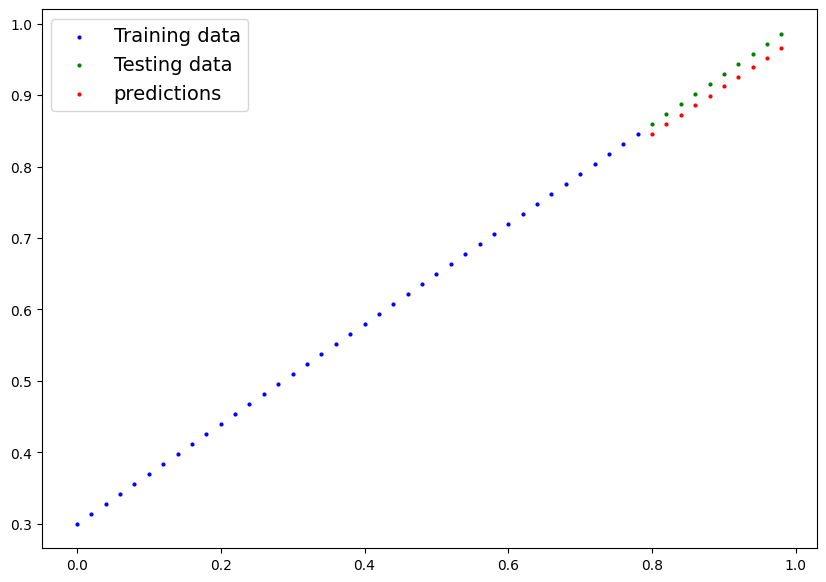

In [ ]:
plot_predictions(predictions=y_preds) # after 150 epochs the accuraracy is on point

Time to Save the model

In [ ]:
from pathlib import Path

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#create moel save path
MODEL_NAME = "01_PyTorch_Workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_PyTorch_Workflow_model_0.pth


In [ ]:
#check for the saved file path
!ls -l models/01_PyTorch_Workflow_model_0.pth

-rw-r--r-- 1 root root 1680 May 13 08:05 models/01_PyTorch_Workflow_model_0.pth


In [ ]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
#put the loaded model into evaluation mode

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)


In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])